In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
import pickle

### Sklearn model import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

### Class imbalance
from imblearn.over_sampling import RandomOverSampler

## Model performance metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Plotting
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
rawData = pd.read_csv('../data/bank-full.csv', sep = ';')

In [3]:
fScore = make_scorer(f1_score)

### Dummy coding categorical variables

In [4]:
rawData.dtypes[rawData.dtypes != np.int64].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [5]:
#rawData['y'] = pd.to_numeric(rawData['y'], columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
#       'month', 'poutcome'])

dummyDf = pd.get_dummies(rawData)

In [6]:
print(rawData.shape)
print(dummyDf.shape)

(45211, 17)
(45211, 53)


In [7]:
dummyDf.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


### Train test split

In [8]:
dummyDf.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [9]:
## Excluding columns:'contact_unknown', 'month_apr', 'month_aug',
##       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
##       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',

X_train, X_test, y_train, y_test = train_test_split(dummyDf[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']], dummyDf['y_yes'], test_size=0.25, random_state=42)

## Model Building

#### Random forest

In [40]:
import time

curr = time.time()

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ] , 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid = GridSearchCV(RandomForestClassifier(random_state = 100), parameters, n_jobs=-1, scoring = fScore)
grid.fit(X_train, y_train)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, grid.predict(X_train), target_names=['no', 'yes']))

print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, grid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.95      1.00      0.98     29972
         yes       0.98      0.63      0.77      3936

    accuracy                           0.96     33908
   macro avg       0.97      0.81      0.87     33908
weighted avg       0.96      0.96      0.95     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9950
         yes       0.66      0.32      0.43      1353

    accuracy                           0.90     11303
   macro avg       0.79      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



In [42]:
time.time() - curr

327.4424817562103

In [43]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, grid.predict(X_train), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.95      1.00      0.98     29972
         yes       0.98      0.63      0.77      3936

    accuracy                           0.96     33908
   macro avg       0.97      0.81      0.87     33908
weighted avg       0.96      0.96      0.95     33908



In [47]:
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, grid.predict(X_test), target_names=['no', 'yes']))

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9950
         yes       0.66      0.32      0.43      1353

    accuracy                           0.90     11303
   macro avg       0.79      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



In [48]:
### Saving model
filename = '../models/random_forest_wo_oversampling.sav'
pickle.dump(grid, open(filename, 'wb'))

#### Decision Tree

In [49]:
dtClf = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
dtGrid = GridSearchCV(dtClf, parameters, n_jobs=-1, scoring = fScore)
dtGrid.fit(X_train, y_train)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, dtGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, dtGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     29972
         yes       0.70      0.46      0.55      3936

    accuracy                           0.91     33908
   macro avg       0.81      0.71      0.75     33908
weighted avg       0.90      0.91      0.91     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      9950
         yes       0.61      0.39      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.68      0.71     11303
weighted avg       0.88      0.90      0.89     11303



In [55]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, dtGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, dtGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     29972
         yes       0.70      0.46      0.55      3936

    accuracy                           0.91     33908
   macro avg       0.81      0.71      0.75     33908
weighted avg       0.90      0.91      0.91     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      9950
         yes       0.61      0.39      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.68      0.71     11303
weighted avg       0.88      0.90      0.89     11303



In [56]:
### Saving model
filename = '../models/decision_tree_wo_oversampling.sav'
pickle.dump(dtGrid, open(filename, 'wb'))

### Xgboost

In [58]:
xgbtClf = xgb.XGBClassifier()
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ] , 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
xgbtGrid = GridSearchCV(xgbtClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
xgbtGrid.fit(X_train, y_train)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, xgbtGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, xgbtGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.98      1.00      0.99     29972
         yes       0.99      0.87      0.92      3936

    accuracy                           0.98     33908
   macro avg       0.99      0.93      0.96     33908
weighted avg       0.98      0.98      0.98     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      9950
         yes       0.59      0.41      0.48      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.69      0.71     11303
weighted avg       0.88      0.90      0.89     11303



In [ ]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, xgbtGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, xgbtGrid.predict(X_test), target_names=['no', 'yes']))

In [60]:
### Saving model
filename = '../models/xgboost_wo_oversampling.sav'
pickle.dump(xgbtGrid, open(filename, 'wb'))

### Logistic regression

In [62]:
logClf = LogisticRegression()
#parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ] , 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
parameters = dict(solver=solvers,penalty=penalty,C=c_values)

logGrid = GridSearchCV(logClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
logGrid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


F:\Covid and Insurance\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
F:\Covid and Insurance\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
F:\Covid and Insurance\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring=make_scorer(f1_score), verbose=10)

In [63]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, logGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, logGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     29972
         yes       0.65      0.33      0.43      3936

    accuracy                           0.90     33908
   macro avg       0.78      0.65      0.69     33908
weighted avg       0.89      0.90      0.89     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9950
         yes       0.65      0.33      0.44      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



In [64]:
### Saving model
filename = '../models/logistic_regression_wo_oversampling.sav'
pickle.dump(logGrid, open(filename, 'wb'))

### SVM

In [65]:
svmClf = svm.SVC()
parameters = {}
svmGrid = GridSearchCV(svmClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
svmGrid.fit(X_train, y_train)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, svmGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, svmGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.88      1.00      0.94     29972
         yes       0.56      0.01      0.02      3936

    accuracy                           0.88     33908
   macro avg       0.72      0.50      0.48     33908
weighted avg       0.85      0.88      0.83     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      9950
         yes       0.56      0.01      0.01      1353

    accuracy                           0.88     11303
   macro avg       0.72      0.50      0.47     11303
weighted avg       0.84      0.88      0.83     11303



In [66]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, svmGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, svmGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.88      1.00      0.94     29972
         yes       0.56      0.01      0.02      3936

    accuracy                           0.88     33908
   macro avg       0.72      0.50      0.48     33908
weighted avg       0.85      0.88      0.83     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      9950
         yes       0.56      0.01      0.01      1353

    accuracy                           0.88     11303
   macro avg       0.72      0.50      0.47     11303
weighted avg       0.84      0.88      0.83     11303



In [67]:
### Saving model
filename = '../models/svm_wo_oversampling.sav'
pickle.dump(svmGrid, open(filename, 'wb'))

### Adaboost classifier

In [10]:
adaboostClf = AdaBoostClassifier()
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ], 'algorithm':['SAMME', 'SAMME.R']}
adaboostGrid = GridSearchCV(adaboostClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
adaboostGrid.fit(X_train, y_train)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, adaboostGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, adaboostGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     29972
         yes       0.65      0.38      0.48      3936

    accuracy                           0.90     33908
   macro avg       0.78      0.68      0.71     33908
weighted avg       0.89      0.90      0.89     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      9950
         yes       0.63      0.37      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.67      0.71     11303
weighted avg       0.88      0.90      0.89     11303



In [69]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_train, adaboostGrid.predict(X_train), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, adaboostGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     29972
         yes       0.65      0.38      0.48      3936

    accuracy                           0.90     33908
   macro avg       0.78      0.68      0.71     33908
weighted avg       0.89      0.90      0.89     33908

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      9950
         yes       0.63      0.37      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.67      0.71     11303
weighted avg       0.88      0.90      0.89     11303



In [70]:
filename = '../models/sdsboost_wo_oversampling.sav'
pickle.dump(adaboostGrid, open(filename, 'wb'))

## Modeling with oversampling minor class

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.25)

X_over, y_over = oversample.fit_resample(X_train, y_train)

### Random forest on oversampled data

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ] , 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid = GridSearchCV(RandomForestClassifier(random_state = 100), parameters, n_jobs=-1, scoring = fScore)
grid.fit(X_over, y_over)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, grid.predict(X_over), target_names=['no', 'yes']))

print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, grid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.95      0.99      0.97     29972
         yes       0.96      0.80      0.87      7493

    accuracy                           0.95     37465
   macro avg       0.95      0.89      0.92     37465
weighted avg       0.95      0.95      0.95     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      9950
         yes       0.60      0.46      0.52      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.71      0.73     11303
weighted avg       0.89      0.90      0.89     11303



In [33]:
filename = '../models/randomforest_w_oversampling.sav'
pickle.dump(grid, open(filename, 'wb'))

### Decision tree on oversampled data

In [74]:
dtClf = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
dtGrid = GridSearchCV(dtClf, parameters, n_jobs=-1, scoring = fScore)
dtGrid.fit(X_over, y_over)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, dtGrid.predict(X_over), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, dtGrid.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.96      0.97      0.97     29972
         yes       0.88      0.84      0.86      7493

    accuracy                           0.94     37465
   macro avg       0.92      0.90      0.91     37465
weighted avg       0.94      0.94      0.94     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.92      0.92      9950
         yes       0.45      0.47      0.46      1353

    accuracy                           0.87     11303
   macro avg       0.69      0.70      0.69     11303
weighted avg       0.87      0.87      0.87     11303



In [75]:
filename = '../models/decisiontree_w_oversampling.sav'
pickle.dump(dtGrid, open(filename, 'wb'))

### Xgboost on oversampled data

In [76]:
xgbtClf = xgb.XGBClassifier()
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ] , 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
xgbtGrid = GridSearchCV(xgbtClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
xgbtGrid.fit(X_over, y_over)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, xgbtGrid.predict(X_over), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, xgbtGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29972
         yes       1.00      1.00      1.00      7493

    accuracy                           1.00     37465
   macro avg       1.00      1.00      1.00     37465
weighted avg       1.00      1.00      1.00     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      9950
         yes       0.58      0.46      0.51      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.71      0.73     11303
weighted avg       0.89      0.89      0.89     11303



In [77]:
### Saving model
filename = '../models/xgboost_w_oversampling.sav'
pickle.dump(xgbtGrid, open(filename, 'wb'))

### SVM on oversampled data

In [78]:
svmClf = svm.SVC()
parameters = {}
svmGrid = GridSearchCV(svmClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
svmGrid.fit(X_over, y_over)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, svmGrid.predict(X_over), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, svmGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.83      0.99      0.90     29972
         yes       0.75      0.18      0.29      7493

    accuracy                           0.82     37465
   macro avg       0.79      0.58      0.59     37465
weighted avg       0.81      0.82      0.78     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      9950
         yes       0.56      0.17      0.26      1353

    accuracy                           0.88     11303
   macro avg       0.73      0.57      0.60     11303
weighted avg       0.86      0.88      0.86     11303



In [79]:
filename = '../models/svm_w_oversampling.sav'
pickle.dump(svmGrid, open(filename, 'wb'))

### Adaboost on oversampled data

In [80]:
adaboostClf = AdaBoostClassifier()
parameters = { 'n_estimators' : [ 100, 120, 140, 160, 180, 200 ], 'algorithm':['SAMME', 'SAMME.R']}
adaboostGrid = GridSearchCV(adaboostClf, parameters, n_jobs=-1, verbose=10, scoring = fScore)
adaboostGrid.fit(X_over, y_over)

print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, adaboostGrid.predict(X_over), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, adaboostGrid.predict(X_test), target_names=['no', 'yes']))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.89      0.95      0.92     29972
         yes       0.72      0.53      0.61      7493

    accuracy                           0.86     37465
   macro avg       0.81      0.74      0.76     37465
weighted avg       0.86      0.86      0.86     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      9950
         yes       0.57      0.51      0.54      1353

    accuracy                           0.90     11303
   macro avg       0.75      0.73      0.74     11303
weighted avg       0.89      0.90      0.89     11303



In [81]:
filename = '../models/adaboost_w_oversampling.sav'
pickle.dump(adaboostGrid, open(filename, 'wb'))

### ROC curve for Xgboost model

In [12]:
filename = '../models/adaboost_w_oversampling.sav'
final_model = pickle.load(open(filename, 'rb'))

In [12]:
plt.style.use("classic")
plt.style.use("bmh")

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.895


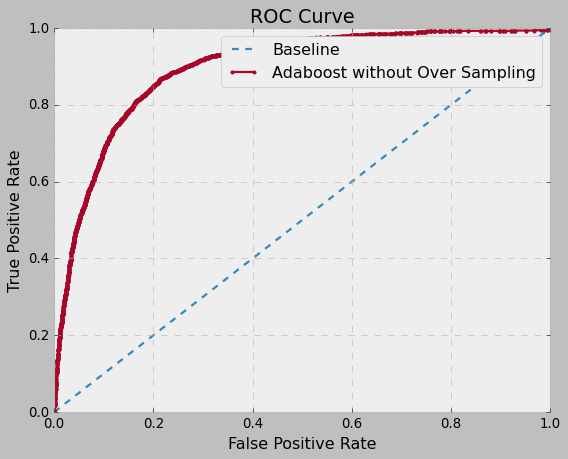

In [13]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = final_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Adaboost without Over Sampling')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.895


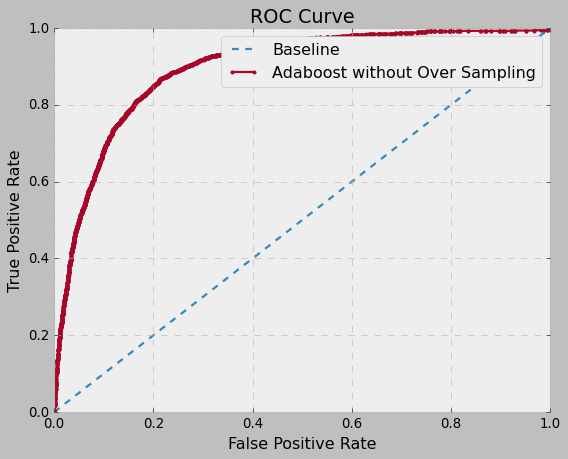

In [14]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = final_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Adaboost without Over Sampling')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Feature Importance

In [18]:
print('*'*10)
print('Train Performance')
print('*'*10)
print(classification_report(y_over, final_model.best_estimator_.predict(X_over), target_names=['no', 'yes']))
print('*'*10)
print('Test Performance')
print('*'*10)
print(classification_report(y_test, final_model.best_estimator_.predict(X_test), target_names=['no', 'yes']))

**********
Train Performance
**********
              precision    recall  f1-score   support

          no       0.89      0.95      0.92     29972
         yes       0.72      0.52      0.61      7493

    accuracy                           0.86     37465
   macro avg       0.80      0.74      0.76     37465
weighted avg       0.86      0.86      0.86     37465

**********
Test Performance
**********
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      9950
         yes       0.57      0.51      0.54      1353

    accuracy                           0.90     11303
   macro avg       0.75      0.73      0.74     11303
weighted avg       0.89      0.90      0.89     11303



In [13]:
a = X_over
a['pred'] = final_model.best_estimator_.predict(X_over)


In [34]:
a[a['pred'] == 1].to_csv('output.csv')

In [25]:
featuerImpDf = pd.DataFrame({'Metric': list(final_model.feature_names_in_), 'Importance':list(final_model.best_estimator_.feature_importances_)})

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Metric'>

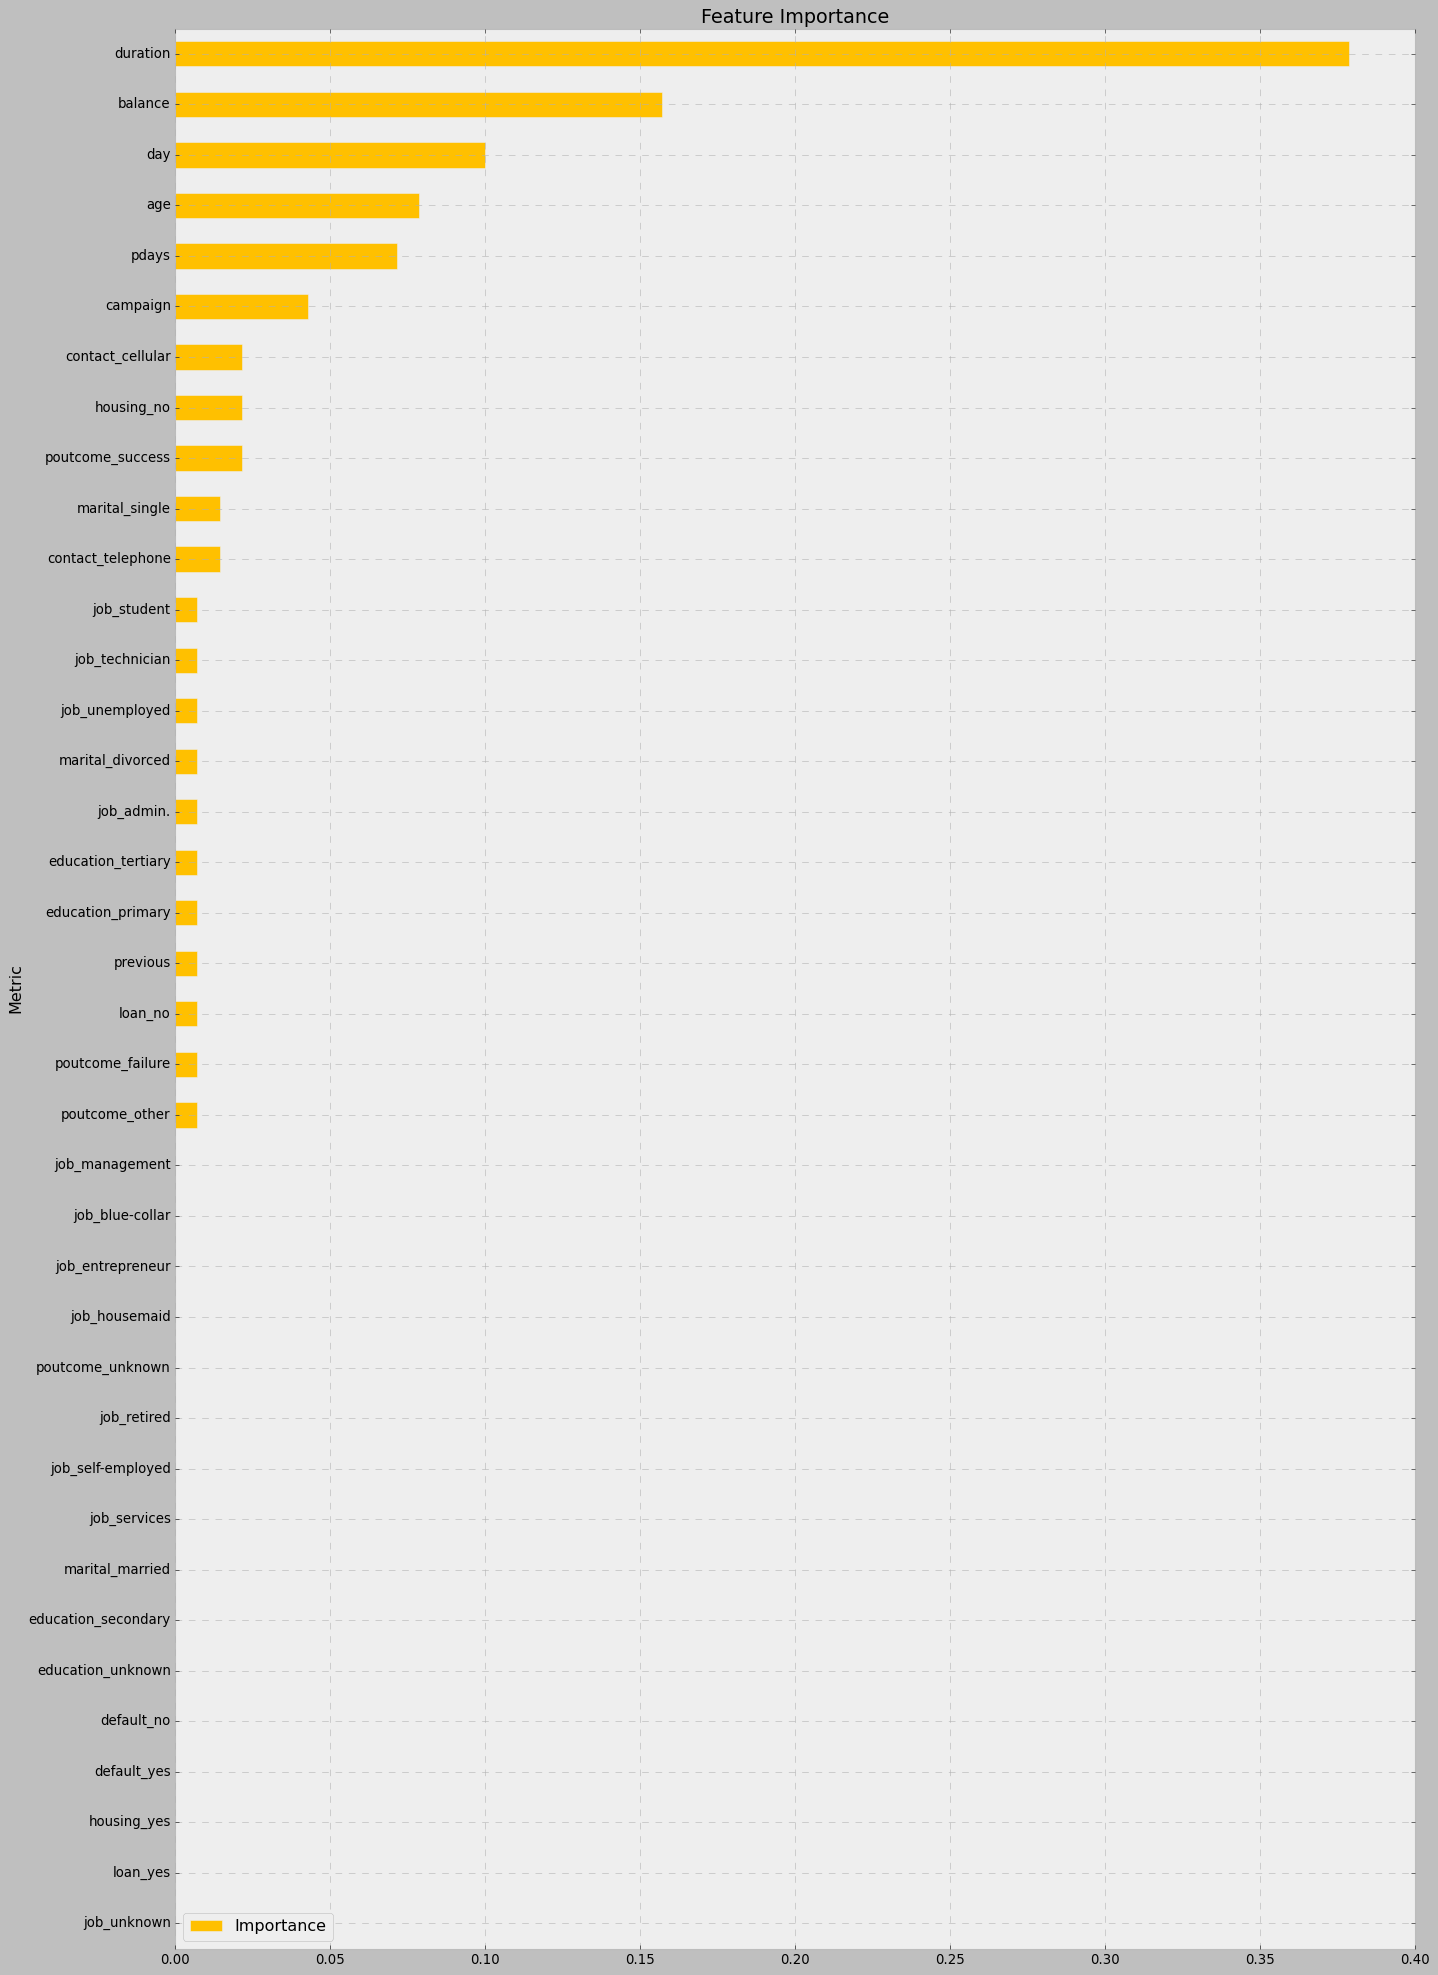

In [29]:
featuerImpDf.sort_values(['Importance']).plot.barh(x='Metric', y='Importance', figsize=(20, 30),  color = '#FFC000', title = 'Feature Importance')

In [30]:
display(featuerImpDf)

,Metric,Importance
0,age,0.078571
1,balance,0.157143
2,day,0.100000
3,duration,0.378571
4,campaign,0.042857
5,pdays,0.071429
6,previous,0.007143
7,job_admin.,0.007143
8,job_blue-collar,0.000000
9,job_entrepreneur,0.000000


### Model comparsion

In [31]:
import sys
import os
import pickle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, auc, roc_curve, accuracy_score

In [32]:
modelsList = os.listdir('../models')

In [33]:
resultsDf = pd.DataFrame()

for i in modelsList:
    resDict = {}
    model = pickle.load(open('../models/'+i, 'rb'))
    
    ## Model stats without oversampling
    if modelsList[0].find('wo') == -1: 
        ## Train metrics
        resDict['model'] = i
        resDict['scenario'] = 'Train'
        resDict['precision'] = precision_score(y_train, model.predict(X_train))
        resDict['accuracy'] = accuracy_score(y_train, model.predict(X_train))
        resDict['recall'] = recall_score(y_train, model.predict(X_train))
        resDict['f1Score'] = f1_score(y_train, model.predict(X_train))
        fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train), pos_label=1)
        resDict['auc'] = auc(fpr, tpr)
        resultsDf = resultsDf.append(pd.DataFrame([resDict]))

        ## Test metrics
        resDict['model'] = i
        resDict['scenario'] = 'Test'
        resDict['precision'] = precision_score(y_test, model.predict(X_test))
        resDict['accuracy'] = accuracy_score(y_test, model.predict(X_test))
        resDict['recall'] = recall_score(y_test, model.predict(X_test))
        resDict['f1Score'] = f1_score(y_test, model.predict(X_test))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=1)
        resDict['auc'] = auc(fpr, tpr)
        
        resultsDf = resultsDf.append(pd.DataFrame([resDict]))
        
    ## Model stats with oversampling
    else:
        ## Train metrics
        resDict['model'] = i
        resDict['scenario'] = 'Train'
        resDict['precision'] = precision_score(y_over, model.predict(X_over))
        resDict['accuracy'] = accuracy_score(y_over, model.predict(X_over))
        resDict['recall'] = recall_score(y_over, model.predict(X_over))
        resDict['f1Score'] = f1_score(y_over, model.predict(X_over))
        fpr, tpr, thresholds = roc_curve(y_over, model.predict(X_over), pos_label=1)
        resDict['auc'] = auc(fpr, tpr)
        resultsDf = resultsDf.append(pd.DataFrame([resDict]))

        ## Test metrics
        resDict['model'] = i
        resDict['scenario'] = 'Test'
        resDict['precision'] = precision_score(y_test, model.predict(X_test))
        resDict['accuracy'] = accuracy_score(y_test, model.predict(X_test))
        resDict['recall'] = recall_score(y_test, model.predict(X_test))
        resDict['f1Score'] = f1_score(y_test, model.predict(X_test))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=1)
        resDict['auc'] = auc(fpr, tpr)
        
        resultsDf = resultsDf.append(pd.DataFrame([resDict]))

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10800\3816291841.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append(pd.DataFrame([resDict]))
C:\Users\Mohan\AppData\Local\Temp\ipykernel_10800\3816291841.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append(pd.DataFrame([resDict]))
C:\Users\Mohan\AppData\Local\Temp\ipykernel_10800\3816291841.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append(pd.DataFrame([resDict]))
C:\Users\Mohan\AppData\Local\Temp\ipykernel_10800\3816291841.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.appe

In [34]:
resultsDf.head()

,model,scenario,precision,accuracy,recall,f1Score,auc
0,adaboost_w_oversampling.sav,Train,0.576602,0.900142,0.525915,0.550093,0.737600
0,adaboost_w_oversampling.sav,Test,0.568275,0.895072,0.513673,0.539596,0.730304
0,decisiontree_w_oversampling.sav,Train,0.786465,0.953079,0.817835,0.801843,0.894337
0,decisiontree_w_oversampling.sav,Test,0.449327,0.867646,0.468588,0.458755,0.695249
0,decision_tree_wo_oversampling.sav,Train,0.695618,0.913678,0.455793,0.550729,0.714801


In [46]:
resultsDf.to_excel('../output/modeling_results.xlsx')

In [ ]:
## Exlcuding month field though it is showing good value from modeling perspective (eleminating as month field is not actionable fr business)